In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, StandardScaler
from sqlite3 import OperationalError
from config import db_password
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
import time
from sklearn.metrics import accuracy_score

In [2]:
absenteeism_file = 'Resources/MFGEmployees4.csv'

absenteeism_df = pd.read_csv(absenteeism_file, index_col=False)
absenteeism_df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [3]:
# Dropping rows with null values
absenteeism_df.dropna()

# We plan to round the age down to reflect how people self-report age
# In this draft, age is rounded up
absenteeism_df["Age"] = absenteeism_df["Age"].round()

# Drop unneeded columns for ML
absenteeism_df = absenteeism_df.drop(["Surname", "GivenName", "BusinessUnit"], axis=1)

# Length Service is presumed to be in Years
# Rounding LengthService and AbsentHours to two decimals to be more accurate rep of time 
absenteeism_df["LengthService"] = absenteeism_df["LengthService"].round(decimals=2)
absenteeism_df["AbsentHours"] = absenteeism_df["AbsentHours"].round(decimals=2)

# Set EmployeeNumber as Index
absenteeism_df.set_index('EmployeeNumber', inplace=True)

absenteeism_df.head()

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours
EmployeeNumber,,,,,,,,,
1,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.0,6.02,36.58
2,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.0,5.53,30.17
3,M,Richmond,Baker,Bakery,Richmond,Stores,49.0,4.39,83.81
4,F,Victoria,Baker,Bakery,Victoria,Stores,45.0,3.08,70.02
5,M,New Westminster,Baker,Bakery,New Westminster,Stores,36.0,3.62,0.00


In [4]:
people_df = absenteeism_df.loc[:,["Gender", "JobTitle", "Age", "LengthService", "AbsentHours"]]
location_df = absenteeism_df.loc[:,["City", "DepartmentName", "StoreLocation", "Division", "AbsentHours"]]

In [5]:
people_df.head()

,Gender,JobTitle,Age,LengthService,AbsentHours
EmployeeNumber,,,,,
1,F,Baker,32.0,6.02,36.58
2,M,Baker,40.0,5.53,30.17
3,M,Baker,49.0,4.39,83.81
4,F,Baker,45.0,3.08,70.02
5,M,Baker,36.0,3.62,0.00


In [6]:
location_df.head()

,City,DepartmentName,StoreLocation,Division,AbsentHours
EmployeeNumber,,,,,
1,Burnaby,Bakery,Burnaby,Stores,36.58
2,Courtenay,Bakery,Nanaimo,Stores,30.17
3,Richmond,Bakery,Richmond,Stores,83.81
4,Victoria,Bakery,Victoria,Stores,70.02
5,New Westminster,Bakery,New Westminster,Stores,0.00


In [ ]:
# Set the file name.
output_data_file = 'Resources/people.csv'

# Create a CSV file by using the clean_hotel_df DataFrame
people_df.to_csv(output_data_file, index_label="#")

In [7]:
# Defining Input Data and Target Data
X = absenteeism_df['Age'].values.reshape(-1, 1)
y = absenteeism_df['AbsentHours'].values.reshape(-1, 1)

# Standardize the data with StandardScaler()
X_scaled=StandardScaler().fit_transform(X)
X_scaled

print("Shape: ", X_scaled.shape, y.shape)

Shape:  (8336, 1) (8336, 1)


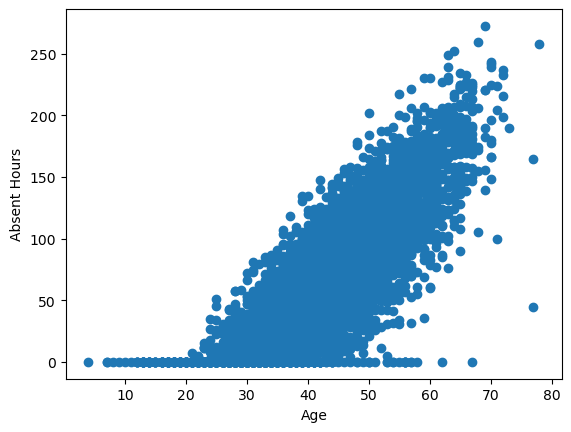

In [8]:
plt.scatter(people_df.Age, people_df.AbsentHours)
plt.xlabel('Age')
plt.ylabel('Absent Hours')
plt.show()

In [9]:
x = people_df[['Age']]
y = absenteeism_df['AbsentHours']
x.head(10)

,Age
EmployeeNumber,
1,32.0
2,40.0
3,49.0
4,45.0
5,36.0
6,48.0
7,51.0
8,36.0
9,58.0


In [10]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
# print the data
x_train

array([[42.],
       [49.],
       [41.],
       ...,
       [46.],
       [46.],
       [27.]])

In [11]:
model = LinearRegression()

In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
X = people_df.Age

In [14]:
Y = people_df.AbsentHours

In [15]:
# Calculate Scores For Training and Testing Data
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

# Use our model to make predictions
predicted = model.predict(x_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Training Score: 0.6868015166990531
Testing Score: 0.6922064772368998
mean squared error (MSE): 707.9718410428652
R-squared (R2): 0.6922064772368998


In [16]:
y_pred = model.predict(x)
print(y_pred.shape)

(8336,)


C:\Users\Hp\anaconda3\envs\Pythondata\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


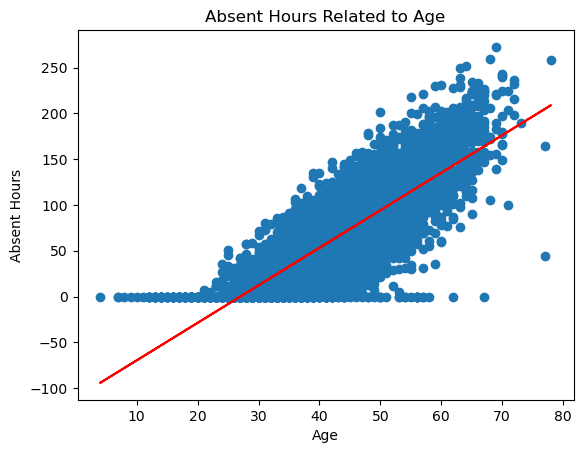

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
#add axis labels and a title
plt.ylabel('Absent Hours')
plt.xlabel('Age')
plt.title('Absent Hours Related to Age')
#display plot
plt.savefig("Resources/Fig4.png")
plt.show()

In [18]:
print(model.coef_)
print(model.intercept_)

[4.09677004]
-110.63176606987616


In [19]:
model.score(x, y)

C:\Users\Hp\anaconda3\envs\Pythondata\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6878401706023866